# TP2: Regression Linéaire 
## Antoine Habis

In [ ]:
fn1 = "Antoine"
ln1 = "Habis"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [33]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
import sklearn.linear_model
from sklearn.preprocessing import normalize
import scipy.stats
import math
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedShuffleSplit
import scipy
from scipy.stats import norm
from sklearn.metrics import r2_score
import seaborn
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR

# Question 1

In [34]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Antoine\Downloads\data_dm3.csv',dialect='excel', header=None)
l,c=data.shape
print('il y a '+str(l)+' observations et '+str(c-1)+' exploratory variables')

il y a 442 observations et 210 exploratory variables


# Question 2

In [35]:
# for i in range (c-1):
#     print (data[i].mean())
for i in range (c):
    print(round(data[i].std(),2),round(data[i].mean(),2))
X1=data[np.random.randint(0,c-2)]
X2=data[np.random.randint(0,c-2)]
X3=data[np.random.randint(0,c-2)]
X4=data[np.random.randint(0,c-2)]
Y=np.array(data[c-1])
print(round(Y.std(),2),round(Y.mean(),2))

1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 -0.0
1.0 -0.0
1.0 0.0
1.0 0.0


les covariates sont centrées et normalizées

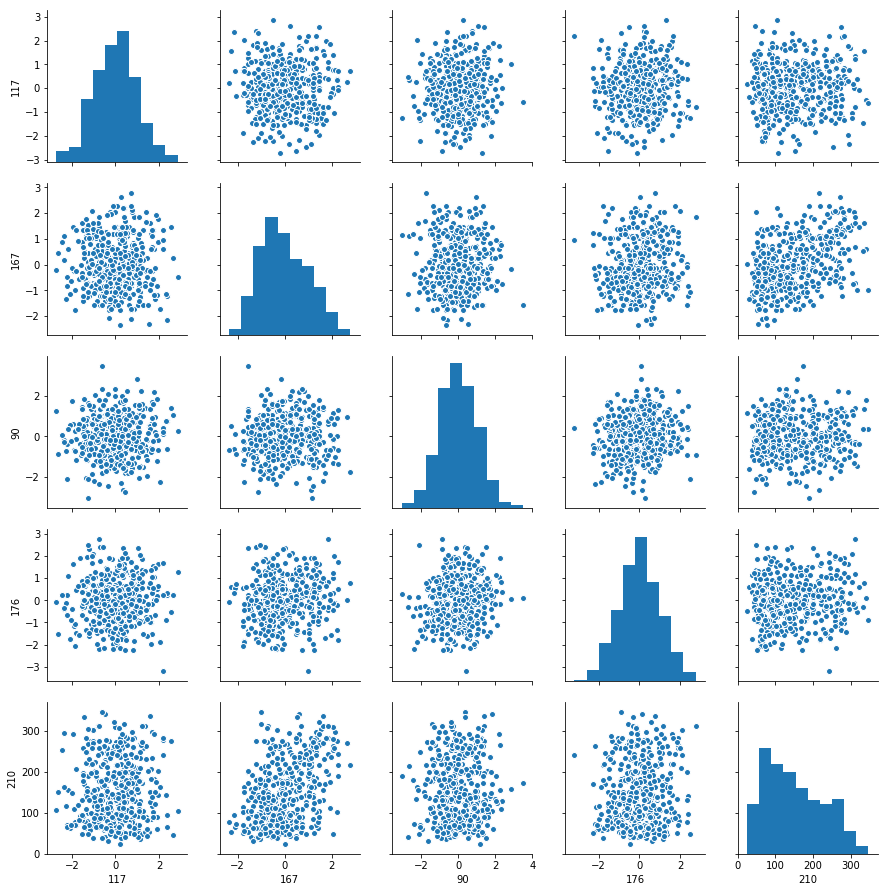

In [37]:
covariates = data[data.columns[0:210]]
i_random = np.random.choice(covariates.columns, 4, False)
seaborn.pairplot(data = pd.concat([covariates[covariates.columns[i_random]], data[data.columns[-1]]], axis = 1))

On remarque que  la distribution s'apparente à celle d'un gaussienne centrée en 0 pour les covariates, comme on l'avait calculé précedemment.
Les covariates sont décorélées les unes des autres.


La distribution de Y n'est pas gaussienne, cela montre que les covariates ne sont pas toutes bonnes,
certaines ont été introduites par le robot.

# Question 3  

In [38]:
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(data.drop(data.columns[[c-1]],axis=1),Y,test_size=0.2)
print('la taille du train est de '+str(X_train.shape))
print('la taille du test est de '+str(X_test.shape))
print('__________________________________________________________________')


la taille du train est de (353, 210)
la taille du test est de (89, 210)
__________________________________________________________________


# Question 4

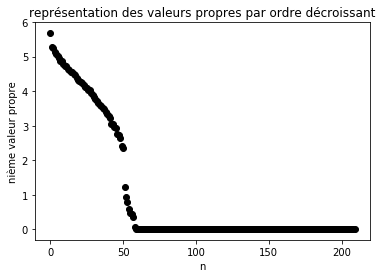

In [39]:
cov=np.dot(X_train.T,X_train)/len(X_train)
eig=sorted(abs(np.linalg.eig(cov)[0]),reverse=True)
n=len(sorted(abs(np.linalg.eig(cov)[0]),reverse=True))
arange=np.arange(0,n,1)


plt.scatter(arange,eig,color='k')
plt.xlabel('n')
plt.ylabel('nième valeur propre')
plt.title('représentation des valeurs propres par ordre décroissant')
plt.show()

Le PCA permet de tranformer une suites de variables liées en nouvelles variables décorrelées. Cela permet d'étudier les composantes principales (avec des valeurs propres élevées). Dans notre cas, il ya 210 features, la taille de la matrice de gram serait de $210\times210$ ce qui est énorme. 
Il faut donc réduire l'information pour rendre cela plus pratiquable.
Nous allons donc prendre les 60 premières car après la 60 èmes, les valeurs propres sont très proches de 0

# Question 5

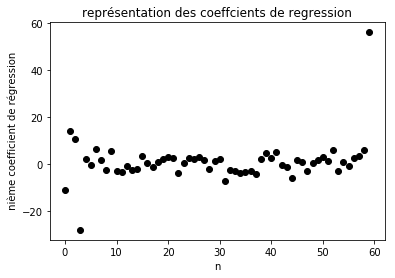

In [40]:
V = np.linalg.eig(cov)[1][:,:60]
V=np.real(V)
V_train=np.dot(X_train,V)
reg = sklearn.linear_model.LinearRegression()
reg.fit(V_train, y_train)
plt.scatter(np.arange(0,60,1), reg.coef_[:], color='k')
plt.xlabel('n')
plt.ylabel(' nième coefficient de régression')
plt.title('représentation des coeffcients de regression')
plt.show()


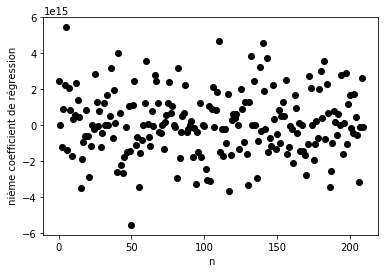

In [41]:
    
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(X_train, y_train)
plt.scatter(np.arange(0,len(reg1.coef_[:]),1), reg1.coef_[:],color='k')
plt.xlabel('n')
plt.ylabel(' nième coefficient de régression')
plt.show()


In [10]:
print('l ordonnée à l origine pour le PCA avant OLS est de '+str(reg.intercept_)+'\n')
print('l ordonnée à l origine pour l OLS est de '+str(reg1.intercept_)+'\n')
print('la moyenne de y_train est de '+str(np.mean(y_train)))

l ordonnée à l origine pour le PCA avant OLS est de 154.1256112956849

l ordonnée à l origine pour l OLS est de 154.06316395184135

la moyenne de y_train est de 156.26628895184135


les deux ordonnées à l'origine ne sont pas égales bien qu'elles soient proches. L'une des ordonnées à l'origine est calculée en fonction des exploratory variables introduites par le robot tandis que l'autre tend à en éliminer un maximum d'exploratory variables liées.

# Question 6

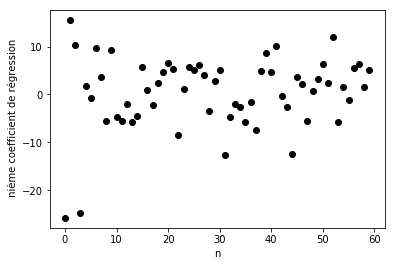

151.8668555240793
151.8668555240793


In [42]:
V = np.linalg.eig(cov)[1][:,:60]
V=np.real(V)
V_train=np.dot(X_train,V)
V_train=sklearn.preprocessing.scale(V_train,axis=0)
reg = sklearn.linear_model.LinearRegression()
reg.fit(V_train, y_train)

plt.scatter(np.arange(0,60,1), reg.coef_[:], color='k')
plt.xlabel('n')
plt.ylabel(' nième coefficient de régression')
plt.show()
print(reg.intercept_)
print(np.mean(y_train))


les deux valeurs sont bien égales 

# Question 7

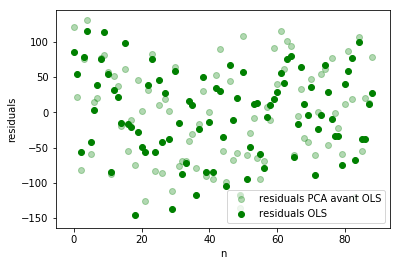

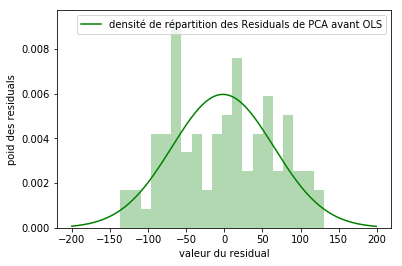

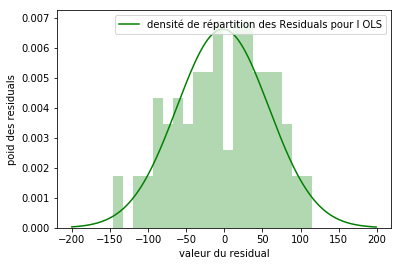

le coefficient de corrélation pour le PCA before OLS est de:  0.43976609972756986
le coefficient de corrélation pour l OLS est de: 0.3137


le prediction risk pour l OLS est de 7.081034144315439
le prediction risk pour l OLS est de 6.397717900690075


In [49]:
V_train=np.dot(X_train,V)
reg = sklearn.linear_model.LinearRegression()
reg.fit(V_train, y_train)

y_chapeau1=reg1.predict(X_test)
y_chapeau=reg.predict(np.dot(X_test,V))
Residuals_PCA_before_ols=y_test-y_chapeau1
Residuals_OLS=y_test-y_chapeau

plt.scatter(np.arange(0,len(Residuals_PCA_before_ols),1),Residuals_PCA_before_ols,label='residuals PCA avant OLS',color='g',alpha=0.3)
plt.scatter(np.arange(0,len(Residuals_OLS),1),Residuals_OLS, label='residuals OLS',color='g')
plt.legend()
plt.ylabel('residuals')
plt.xlabel('n')
plt.show()
plt.hist(Residuals_PCA_before_ols,bins=20, density=True, color='g',alpha=0.3)


x=np.arange(-200,200)
plt.plot(x, norm.pdf(x, *norm.fit(Residuals_PCA_before_ols)), color='green',label='densité de répartition des Residuals de PCA avant OLS')
plt.ylabel('poid des residuals')
plt.xlabel('valeur du residual')
plt.legend()
plt.show()
plt.hist(Residuals_OLS,bins=20, density=True, color='green',alpha=0.3)
x=np.arange(-200,200)


plt.plot(x, norm.pdf(x, *norm.fit(Residuals_OLS)), color='green',label='densité de répartition des Residuals pour l OLS')
plt.ylabel('poid des residuals')
plt.xlabel('valeur du residual')
plt.legend()
plt.show()


R_PCA_before_OLS=reg.score(np.dot(X_test,V),y_test)
R_OLS=r2_score(y_test, reg1.predict(X_test))
print('le coefficient de corrélation pour le PCA before OLS est de:  '+str(R_PCA_before_OLS))
print('le coefficient de corrélation pour l OLS est de: '+str(round(R_OLS,4)))
print('\n')
print('le prediction risk pour l OLS est de '+str(np.sqrt(((reg1.predict(X_test)-np.array(y_test))**2).sum())/len(y_test)))
print('le prediction risk pour l OLS est de '+str(np.sqrt(((reg.predict(np.dot(X_test,V))-np.array(y_test))**2).sum())/len(y_test)))

# Question 8,9

Text(0,0.5,'valeur de la nième pvalue')

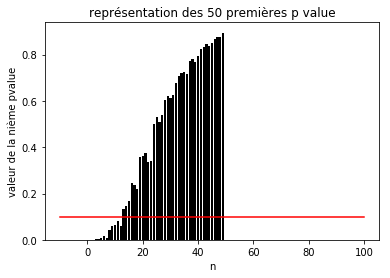

In [13]:
X_augmenté = np.column_stack( (np.ones( (X_train.shape[0], 1 )), X_train )) 

p = X_augmenté.shape[1]
n = X_augmenté.shape[0]

test = np.zeros((p,p))
pval_mem = np.zeros(p)
pval = np.zeros((p,p))
R = y_train
var_sel = []
List_50_first_pval=[]
m=50
var_remain = list(range(p))
in_test = []
reg2 = sklearn.linear_model.LinearRegression(fit_intercept = False)
for k in range(p): 
    R_memoire = np.zeros((p,n))
    for i in var_remain:
        X_i = X_augmenté [:,[i]]
        reg2.fit(X_i , R)
        xx = np.sum( X_augmenté [:,[i]] ** 2 )    
        R_memoire [i,:] = reg2.predict(X_i) - R
        sigma_n = np.sum (R_memoire [i,:] ** 2) / xx
        test[k,i] = np.sqrt(n) * np.abs(reg2.coef_) / (np.sqrt( sigma_n )) 
        pval[k,i] =   2 * (1 - scipy.stats.norm.cdf(test[k,i]))

    k_enlevé = np.argmax(test[k,:])
    var_sel.append(k_enlevé)
    R = R_memoire[k_enlevé,:]
    pval_mem [k] = pval[k,k_enlevé]
    if m>0:
        List_50_first_pval.append(pval[k,k_enlevé])
        m-=1
    var_remain = np.setdiff1d(var_remain,var_sel)
plt.bar(np.arange(0,50), List_50_first_pval, color='k' )
plt.plot([-10,100],[0.1,0.1],color='r')
plt.title('représentation des 50 premières p value')
plt.xlabel('n')
plt.ylabel('valeur de la nième pvalue')


In [50]:
def forward_selection_method(X,Y,p_stop,reg):
    X_augmenté = np.column_stack( (np.ones( (X.shape[0], 1 )), X )) 
    p = X_augmenté.shape[1]
    n = X_augmenté.shape[0]
    test = np.zeros((p,p))
    pval_mem = np.zeros(p)
    pval = np.zeros((p,p))
    R = y_train
    var_sel = []
    var_remain = list(range(p))
    in_test = []
    m=3
    M=[]
    S=0
    count=0
    for k in range(p): 
        R_memoire = np.zeros((p,n))
        p_value_min=10**10
        L=[]
        for i in var_remain:
            X_i = X_augmenté [:,[i]]
            reg.fit(X_i , R)
            xx = np.sum( X_augmenté [:,[i]] ** 2 )    
            R_memoire [i,:] = reg.predict(X_i) - R
            sigma_n = np.sum (R_memoire [i,:] ** 2) / xx                
            test[k,i] = np.sqrt(n) * np.abs(reg.coef_) / (np.sqrt( sigma_n ))
            if count<3:
                L.append(test[k,i])
            pval[k,i] =   2 * (1 - scipy.stats.norm.cdf(test[k,i]))
            p_value_min=min(p_value_min,pval[k,i])
        if count==0:
            plt.scatter(np.arange(len(L)),L,color='g',alpha=0.4)
            plt.title('représentation des valeurs des test au premier passage')
            plt.ylabel('valeur du nième test')
            plt.xlabel('n')
            plt.show()
        if count==1:
            plt.scatter(np.arange(len(L)),L,color='g',alpha=0.4)
            plt.title('représentation des valeurs des test au second passage')
            plt.ylabel('valeur du nième test')
            plt.xlabel('n')
            plt.show()
        if count==2:
            plt.scatter(np.arange(len(L)),L,color='g',alpha=0.4)
            plt.title('représentation des valeurs des test au troisième passage')
            plt.ylabel('valeur du nième test')
            plt.xlabel('n')
            plt.show()
        count+=1
        if (p_value_min>p_stop):
            break
        else:
            k_enlevé = np.argmax(test[k,:])
            var_sel.append(k_enlevé)
            R = R_memoire[k_enlevé,:]
            pval_mem [k] = pval[k,k_enlevé]
            var_remain = np.setdiff1d(var_remain,var_sel)
            M.append(k_enlevé)
            S+=1
    return(M)



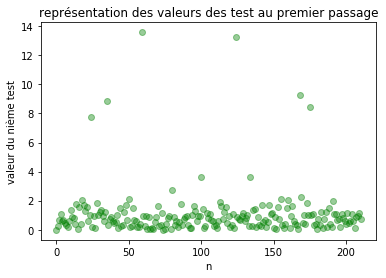

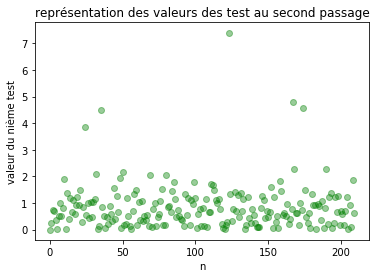

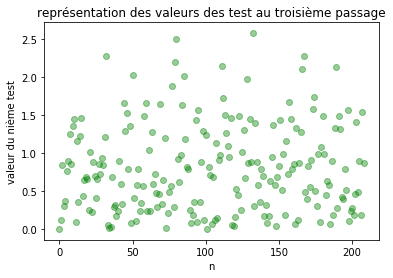

[59, 124, 134, 168, 81, 191, 136, 86, 58, 70, 175, 158]

In [51]:
forward_selection_method(X_train,y_train,0.1,reg1)

# Question 10

ne cprenez pas en compte les plots, ils viennent de la définition de forward_selection_method

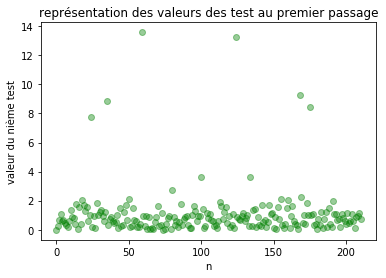

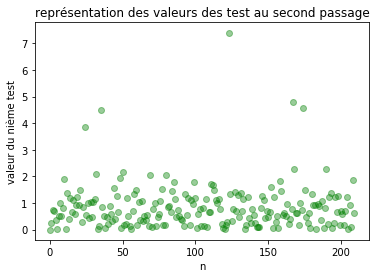

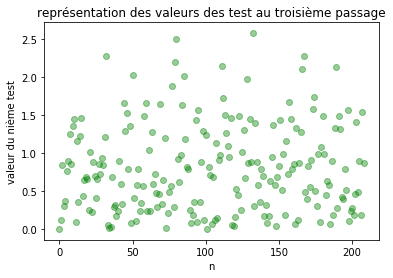

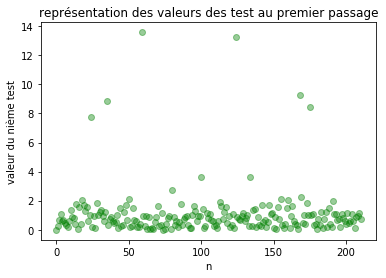

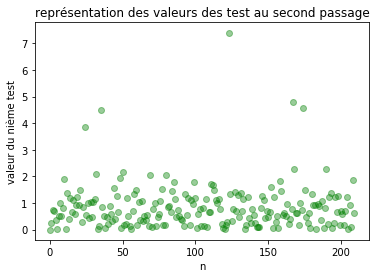

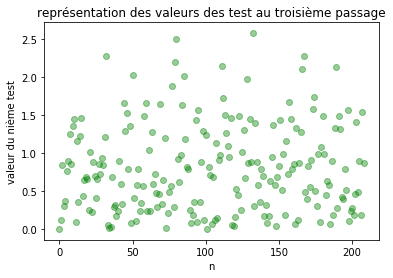

Le prediction risk est de: 7.030825798750072


In [52]:
X_train2=X_train[forward_selection_method(X_train,y_train,0.1,reg1)]
reg_sel=sklearn.linear_model.LinearRegression().fit(X_train2,y_train)
X_test=np.array(X_test)
epsilon = y_test - reg_sel.predict(X_test[:, forward_selection_method(X_train,y_train,0.1,reg1)])
epsilon_carre = abs(epsilon)**2
predic_risk = (1/len(y_test))*np.sqrt((sum(epsilon_carre)))
print("Le prediction risk est de: "+str(predic_risk))

# Question 11

In [17]:
folder_x1_init,folder_x2_init,folder_y1_init,folder_y2_init=sklearn.model_selection.train_test_split(X_train,y_train,test_size=0.5)
folder_x1,folder_x2,folder_y1,folder_y2=sklearn.model_selection.train_test_split(folder_x1_init,folder_y1_init,test_size=0.5)
folder_x3,folder_x4,folder_y3,folder_y4=sklearn.model_selection.train_test_split(folder_x2_init,folder_y2_init,test_size=0.5)
folderX=[folder_x1,folder_x2,folder_x3,folder_x4]
folderY=[folder_y1,folder_y2,folder_y3,folder_y4]
print(len(folder_x1),len(folder_x2),len(folder_x3),len(folder_x4))
print('les folders sont tous de tailles égales')

88 88 88 89
les folders sont tous de tailles égales


# Question 12

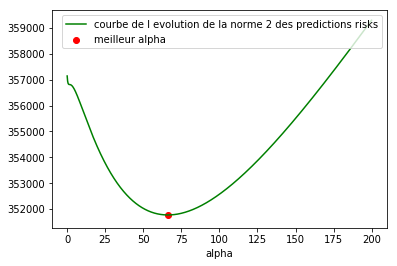

la valeur de alpha optimale est de 66.2


In [53]:
plage_de_alpha=np.arange(0.1,200,0.1)
sum_pred_risk = []
for l in plage_de_alpha:
    fold_X = []
    fold_Y = []
    prediction_errors = []
    for k in range(4):
        L=[0,1,2,3]
        del L[k]
        X = np.concatenate([folderX[k] for k in L])
        Y = np.concatenate([folderY[k] for k in L])
        fold_X.append(X)
        fold_Y.append(Y)
        prediction_errors.append(folderY[k] - Ridge(l).fit(fold_X[k],fold_Y[k]).predict(folderX[k]))

    for i in range(len(prediction_errors)):
        prediction_errors[i] = np.linalg.norm(list(prediction_errors[i]))**2
    sum_pred_risk.append(np.mean(sum(prediction_errors))/(len(prediction_errors)))
plt.plot(plage_de_alpha, sum_pred_risk,color='g',label='courbe de l evolution de la norme 2 des predictions risks')
plt.scatter(plage_de_alpha[np.argmin(sum_pred_risk)],np.min(sum_pred_risk),color='r',label='meilleur alpha')
plt.xlabel('alpha')
plt.legend()
plt.show()
print('la valeur de alpha optimale est de '+str(plage_de_alpha[np.argmin(sum_pred_risk)]))

# Question 13

In [19]:
lasso_reg = LassoCV().fit(X_train, y_train)
res_lasso = y_test - lasso_reg.predict(X_test)
pred_risk_lasso = np.mean(res_lasso**2)/len(res_lasso)
print("le risque est de : " + str(pred_risk_lasso))

le risque est de : 23.787836298846894


# Question 14

On va chercher ici les variables que lasso a détecté comme étant non nulles puis on fait ensuite la regression linéaire et la détermination du risque de prédiction

In [20]:
lasso_sel_var = np.where((lasso_reg.coef_ != 0))[0]

print('Les variables selectionnées par Lasso sont : ' + str(lasso_sel_var) + '\n')
print('Il y en a  : ' + str(len(lasso_sel_var)) + '\n')

reg3 = sklearn.linear_model.LinearRegression().fit(X_train.iloc[:, lasso_sel_var], y_train)
residuals = y_test - reg3.predict(X_test[:, lasso_sel_var])
risk = np.mean(residuals**2)/len(residuals)

print('Le prediction risk vaut  : ' + str(risk))



Les variables selectionnées par Lasso sont : [ 13  17  58 112 123 129 167 174]

Il y en a  : 8

Le prediction risk vaut  : 24.82888045865691


# Question 15

In [55]:
plage_c = [2.0**(k) for k in (np.arange(-5, 16))]
plage_g = [2.0**(k) for k in (np.arange(-15,4))]
l1 = []
l2 = []
for c in plage_c:
    for g in plage_g:
        prediction_errors =[]
        fold_X= []
        fold_Y = []
        for k in range(4):
            L = [0, 1, 2, 3]
            del L[k]
            X = np.concatenate([folderX[k] for k in L])
            Y = np.concatenate([folderY[k] for k in L])
            fold_X.append(X)
            fold_Y.append(Y)
            U=SVR(gamma = g, C = c).fit(fold_X[k],fold_Y[k]).predict(folderX[k])
            prediction_errors.append(folderY[k] -U )

        for i in range(len(prediction_errors)):
            prediction_errors[i] = np.linalg.norm(list(prediction_errors[i]))**2
        l1.append([])
        l1[-1].append(sum(prediction_errors))
        l2.append(np.argmin(l1[-1]))

print('la valeur de C est de: '+str(plage_c[np.argmin(l2)])+'\nla valeur de gamma est de: '+str( plage_g[np.argmin(l1[np.argmin(l2)])]))
eps = y_test - SVR(gamma = g, C = c).fit(X_train,y_train).predict(X_test)
eps_carre = abs(eps)**2
risk = (1/len(y_test))*np.sqrt((sum(eps_carre)))
print("Le prediction risk est de "+str(risk))

la valeur de C est de: 0.03125
la valeur de gamma est de: 3.0517578125e-05
Le prediction risk est de 8.548657517945026


Le prediction risk est supérieur à celui calculé avec les regressions linéaires. Il vaut donc mieux utiliser les régressions linéaires